In [ ]:
import zipfile
import os
import numpy as np

# extracted_dir = '/content/drive/MyDrive/IA/Mariposas_images'
extracted_dir = '/home/squispeb/university/ML-Classification-p/mariposasimg'

if not (os.path.exists(extracted_dir) and os.path.isdir(extracted_dir)):
  zip_file_path = '/home/squispeb/university/ML-Classification-p/Mariposas.zip'
  print(zip_file_path)
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extracted_dir)
  print("Everything extracted")
else:
  print("Everything already extracted")

In [ ]:
import os
import numpy as np
from PIL import Image
import pywt
import pywt.data

images_dir = extracted_dir + "/images"
file_list = os.listdir(images_dir)

newy = 64
newx = 128

new_images_path = extracted_dir + "/images" + str(newx) + "x" + str(newy)
if not os.path.exists(new_images_path):
  os.makedirs(new_images_path)

  for filename in file_list:
    if filename.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp')):


        image_path = os.path.join(images_dir, filename)

        image = Image.open(image_path)
        resized_image = image.resize((newx, newy))


        resized_image.save( new_images_path + "/" + filename)
        resized_image.close()
        image.close()

Y = []
X = []
for filename in file_list:
  if filename.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp')):
    Y.append([int(filename[0:3])])
    image_path = os.path.join(new_images_path, filename)
    image = Image.open(image_path)
    image = image.convert('L')
    wavelet = 'haar'  # Puedes cambiar la wavelet según tus necesidades
    coeffs = pywt.dwt2(image, wavelet)
    approximation, (horizontal_detail, vertical_detail, diagonal_detail) = coeffs
    vector_caracteristico = approximation.flatten()
    X.append(vector_caracteristico)

X = np.array(X)
print(X.shape)
Y = np.array(Y)
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=50)

# Ajustar PCA a tus datos.
X = pca.fit_transform(X)

Loss on Training Data: 2.123786339385372
Loss on Test Data: 2.61871423008774
R-squared (R2) on Test Data: 0.8739305249107175


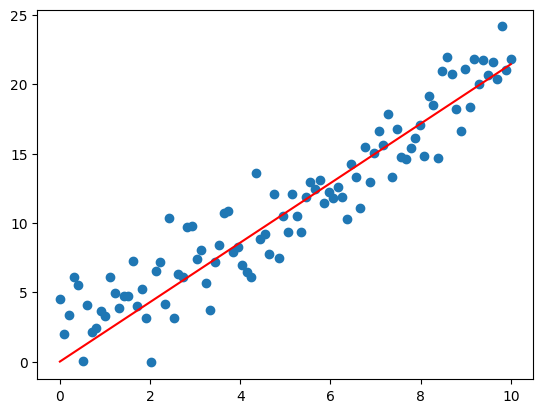

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None
        self.L = None

    def h(self, x):
        return np.dot(x, self.w)

    def LossFunction(self, x, y):
        n = len(x)
        loss = np.sum((self.h(x) - y) ** 2) / (2 * n)
        return loss

    def Derivatives(self, x, y):
        n = len(x)
        dw = np.dot(x.T, (self.h(x) - y)) / n
        db = np.sum(self.h(x) - y) / n
        return dw, db

    def ChangeParameters(self, x, y, alpha):
        dw, db = self.Derivatives(x, y)
        self.w -= alpha * dw
        self.b -= alpha * db

    def Training(self, x, y, epochs=100, alpha=0.01):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=41)
        self.w = np.random.random(x.shape[1])
        self.b = 0
        for i in range(epochs):
            self.L = self.LossFunction(x_train, y_train)
            dw, db = self.Derivatives(x_train, y_train)
            self.w -= alpha * dw
            self.b -= alpha * db
        test_loss = self.LossFunction(x_test, y_test)
        return self.L, test_loss

    def Testing(self, x):
        y_pred = self.h(x)
        return y_pred

    def Graph(self, x, y):
        plt.scatter(x, y)
        plt.plot(x, model.h(x.reshape(-1, 1)), color='red')
        plt.show()

# Generar datos de ejemplo
np.random.seed(0)
X = np.linspace(0, 10, 100)
Y = 2 * X + 1 + np.random.normal(0, 2, 100)

# Crear una instancia del modelo
model = LinearRegression()

# Entrenar el modelo y obtener las pérdidas de entrenamiento y prueba
train_loss, test_loss = model.Training(X.reshape(-1, 1), Y, epochs=1000, alpha=0.01)

# Calcular el coeficiente de determinación R2 en los datos de prueba
y_pred = model.Testing(X.reshape(-1, 1))
r2 = r2_score(Y, y_pred)

# Imprimir las pérdidas y R2
print("Loss on Training Data:", train_loss)
print("Loss on Test Data:", test_loss)
print("R-squared (R2) on Test Data:", r2)

# Visualizar los datos y la línea de regresión
model.Graph(X, Y)